# Week7 Practice

## 1. Logistic Regression : 합격 여부 판단

### 1) 로지스틱 회귀

In [1]:
import numpy as np

# (시험 1점수), (시험2 점수), (합격 여부)
# Ng, Machine Learning, Course, ml-ex 중
import pandas as pd

data = pd.read_csv("admit.txt", names=['ex1', 'ex2', 'Admitted'])
data

,ex1,ex2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [2]:
X = np.c_[data["ex1"], data["ex2"]]
y = data["Admitted"]
m = len(data)

# numpy array 형태로 변환, 형태 변환(m) -> (m, 1)
X = np.array(X).reshape(m, 2)
y = np.array(y).reshape(m, 1)
print(X.shape, y.shape)

(100, 2) (100, 1)


### 2) 그래프 그리기

In [3]:
pos = []
neg = []

for i, val in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


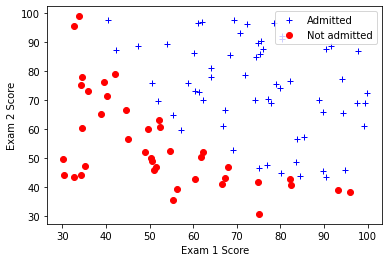

In [4]:
import matplotlib.pyplot as plt

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label="Admitted")
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label="Not admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc="upper right")
plt.show()

### 3) 학습

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", C=10) # C가 클수록 regularization 약해짐
log_reg.fit(X, y)

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=10, solver='liblinear')

In [6]:
# exam1 30, exam2 70
# exam1 50, exam2 90
# 합격? 불합격?
log_reg.predict([[30, 70],
                 [50, 90]])

array([0, 1])

### 4) Decision Boundary

/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/1607568763.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


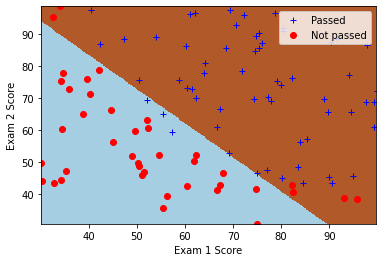

In [7]:
# Plot the decision boundary. For thatm we will assign a color to each
# points in the mesh [x_min, x_max] * [y_min, y_max]]
exam1_min, exam1_max = X[:, 0].min(), X[:, 0].max()
exam2_min, exam2_max = X[:, 1].min(), X[:, 1].max()
h = .2 # step size in the mesh
xx, yy = np.meshgrid(np.arange(exam1_min, exam1_max, h), np.arange(exam2_min, exam2_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label="Passed")
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label="Not passed")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc="upper right")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

## 2. 로지스틱 회귀 + 정규화 
- 1) 합격 여부 데이터 읽기
- 2) 그래프 그리기
- 3) 학습 
- 4) decision boundary

### 1) 불량 여부 데이터 읽기

In [8]:
import numpy as np
import pandas as pd

data = pd.read_csv("qa.txt", names=["t1", "t2", "Passed"])
data

,t1,t2,Passed
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [9]:
X = np.c_[data["t1"], data["t2"]]
y = data["Passed"]
m = len(data)

X = np.array(X).reshape(m, 2)
y = np.array(y).reshape(m, 1)
print(X.shape, y.shape)

(118, 2) (118, 1)


### 2) 그래프 그리기

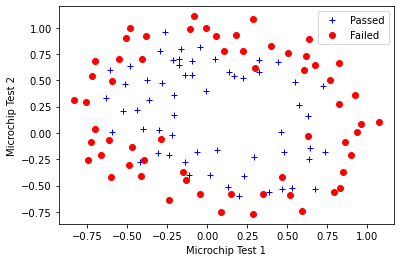

In [10]:
import matplotlib.pyplot as plt

pos = [i for i, val in enumerate(y) if val == 1]
neg = [i for i, val in enumerate(y) if val == 0]

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label="Passed")
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label="Failed")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right")
plt.show()

### 3) 학습

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0].shape)


[0.051267 0.69956 ]
(27,)


In [12]:
poly_features = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly_features.fit_transform(X)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=1e-1)
log_reg.fit(X_poly, y)

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.1, solver='liblinear')

### 4) Decision boundary

In [13]:
def draw_plot():
    u = np.linspace(-1, 1.5, 300)
    v = np.linspace(-1, 1.5, 300)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        a = []
        for j in range(len(v)):
            a.append(np.array([u[i], v[j]]))
        mydata = poly_features.fit_transform(a)
        z[i] = log_reg.predict(mydata)

    plt.contour(u, v, z, 0)

    plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label='Passed')
    plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label='Failed')
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend(loc="upper right")
    plt.show()

#### C = 1e4

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/879285045.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z, 0)


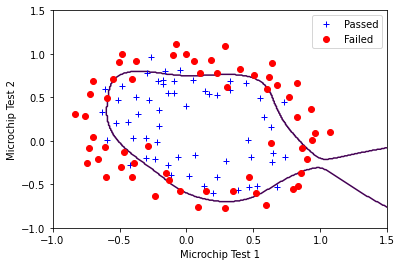

In [14]:
log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=1e4)
log_reg.fit(X_poly, y)
draw_plot()

#### C = 100

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/879285045.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z, 0)


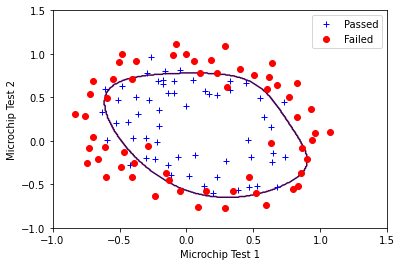

In [15]:
log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=100)
log_reg.fit(X_poly, y)
draw_plot()

#### C = 1e-1

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/879285045.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z, 0)


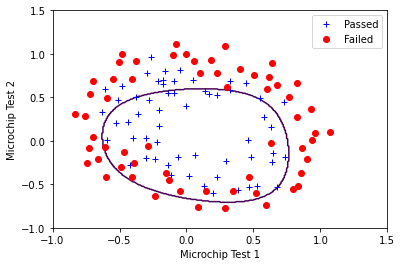

In [16]:
log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=1e-1)
log_reg.fit(X_poly, y)
draw_plot()

#### C = 1e-2

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/879285045.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z, 0)


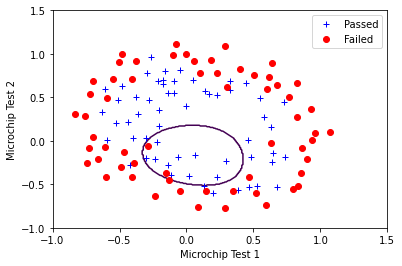

In [17]:
log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=1e-2)
log_reg.fit(X_poly, y)
draw_plot()

#### C = 10

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2630/879285045.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z, 0)


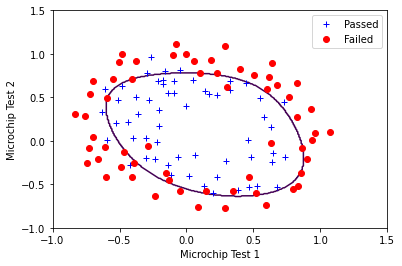

In [43]:
log_reg = LogisticRegression(penalty="l2", solver="liblinear", C=10)
log_reg.fit(X_poly, y)
draw_plot()

## 3. 로지스틱 회귀의 성능 측정법

- 편의상 trainset에 대하여 prediction함
- 원래는 validation, testset에 대하여 진행해야함

In [44]:
# 1. y값 prediction
y_pred = log_reg.predict(X_poly)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

[[48 12]
 [ 7 51]]


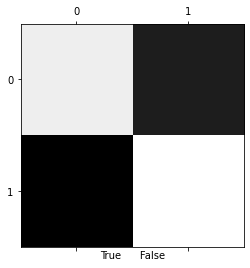

In [45]:
# 2. confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xlabel("True      False")
plt.show()

In [46]:
# 3. precision & recall
from sklearn.metrics import precision_score, recall_score
print(f"precision score\t: {precision_score(y, y_pred)}")
print(f"recall score \t: {recall_score(y, y_pred)}")

precision score	: 0.8095238095238095
recall score 	: 0.8793103448275862


In [47]:
# 4. F1 score
from sklearn.metrics import f1_score
print(f"F1 Score.  \t: {f1_score(y, y_pred)}")

F1 Score.  	: 0.8429752066115702


In [48]:
# y probability
y_scores = log_reg.decision_function(X_poly)
y_scores

array([ 1.63843998,  1.94870322,  1.83153079,  2.07479026,  1.20384302,
        0.91958736,  1.31539768,  0.80459852,  0.82760904,  0.34247932,
        0.26874529,  0.39113702,  1.15018989,  0.3675054 ,  1.00655759,
        1.68656454,  2.48685032,  0.57866268,  1.82488372,  1.02837843,
       -0.0467156 ,  0.03289813, -0.42938371, -0.39917066,  0.41712539,
       -0.25910028,  0.43110646, -0.46895755,  2.65489212,  0.95626797,
       -1.54699759,  0.88657635,  2.1577756 ,  2.50719834,  2.1878541 ,
        1.81771385,  1.02809592,  1.81395712,  2.20602113,  1.23912949,
        2.17463203,  2.0701022 ,  1.34295993,  2.51972163,  1.58133983,
        1.78062333, -0.65522793,  2.41551423,  0.09682876,  0.64037237,
        2.35303768,  3.07165023,  2.66452047,  2.80652746,  2.59639042,
        1.59857899,  1.99978436,  1.11263191, -2.56980435,  0.04554951,
        1.49571632, -1.77163854, -2.55435503, -0.53134378, -1.80424451,
       -4.35511438, -1.34643544, -4.22341218, -3.42362307, -1.55

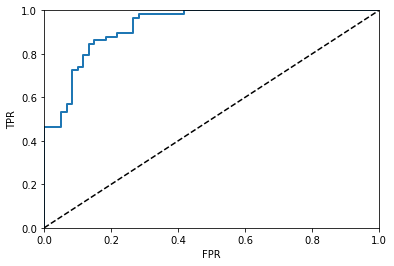

In [49]:
# 5. ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")

plot_roc_curve(fpr, tpr)
plt.show()

In [50]:
# 6. AUC 
from sklearn.metrics import roc_auc_score
print(f"roc_auc_score : {roc_auc_score(y, y_pred)}")

roc_auc_score : 0.8396551724137932
